#  Internship number - DS2312

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
column_names = ['S.no', 'RI', 'Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of Glass']
df = pd.read_csv('Glass Identification.csv', names=column_names)

In [3]:
df

,S.no,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S.no           214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [5]:
df.describe()

,S.no,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<AxesSubplot:>

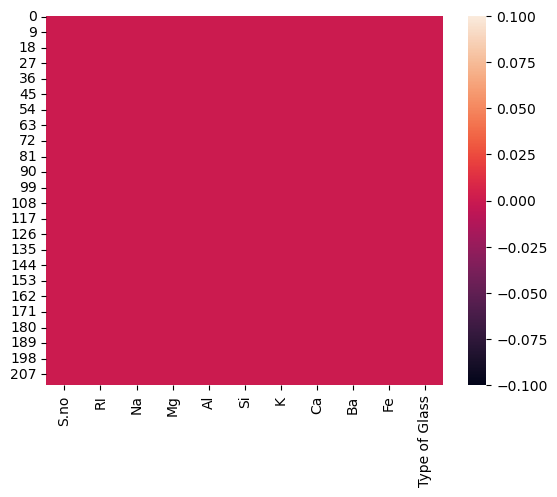

In [6]:
sns.heatmap(df.isna())

In [7]:
df['Type of Glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64

<AxesSubplot:xlabel='Type of Glass', ylabel='count'>

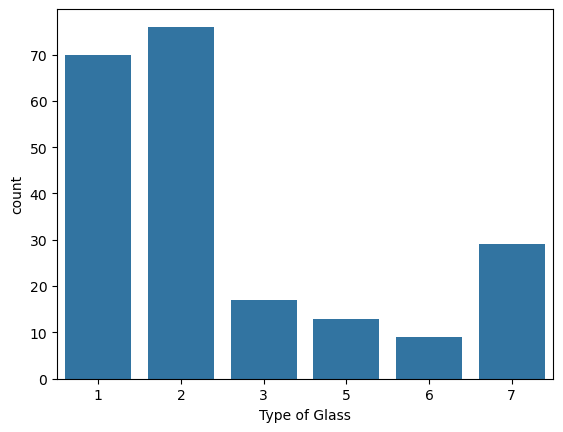

In [8]:
sns.countplot(x = 'Type of Glass', data =df)

<AxesSubplot:>

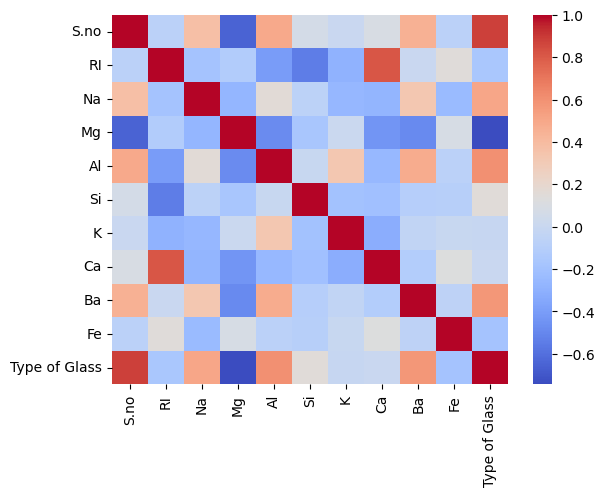

In [9]:
sns.heatmap(df.corr(),cmap='coolwarm')

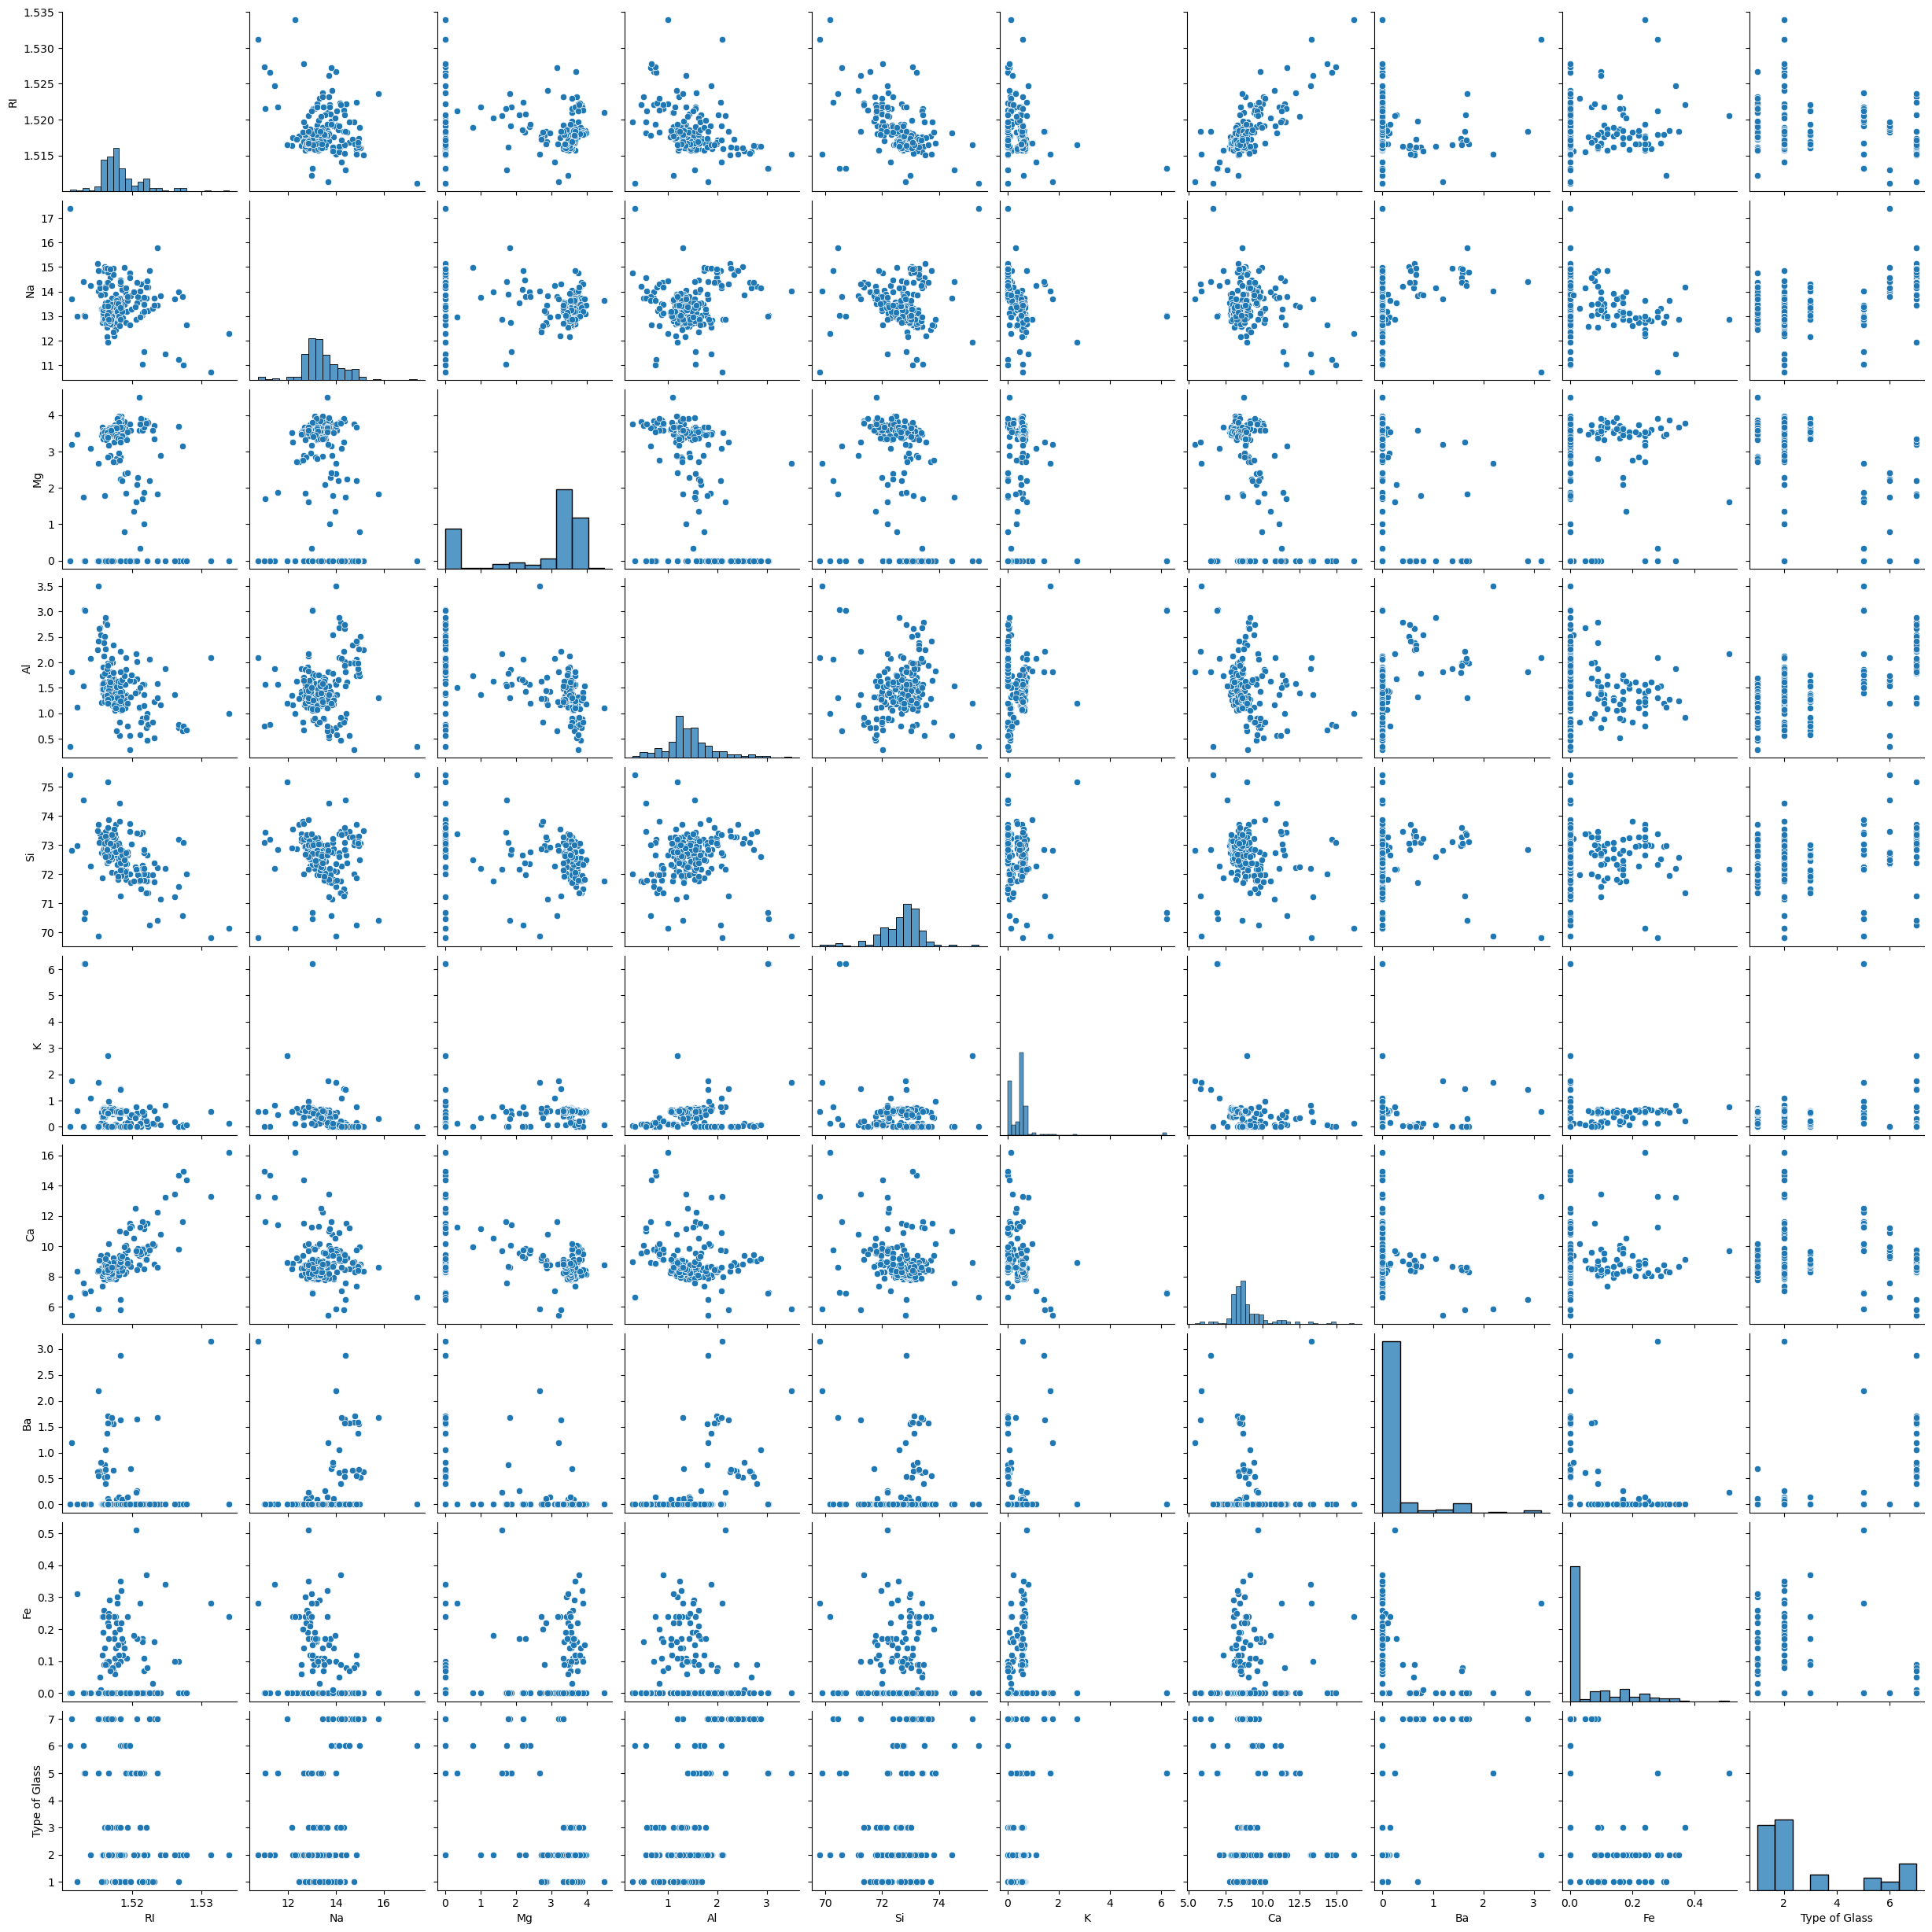

In [10]:
sns.pairplot(df.drop('S.no',axis=1))

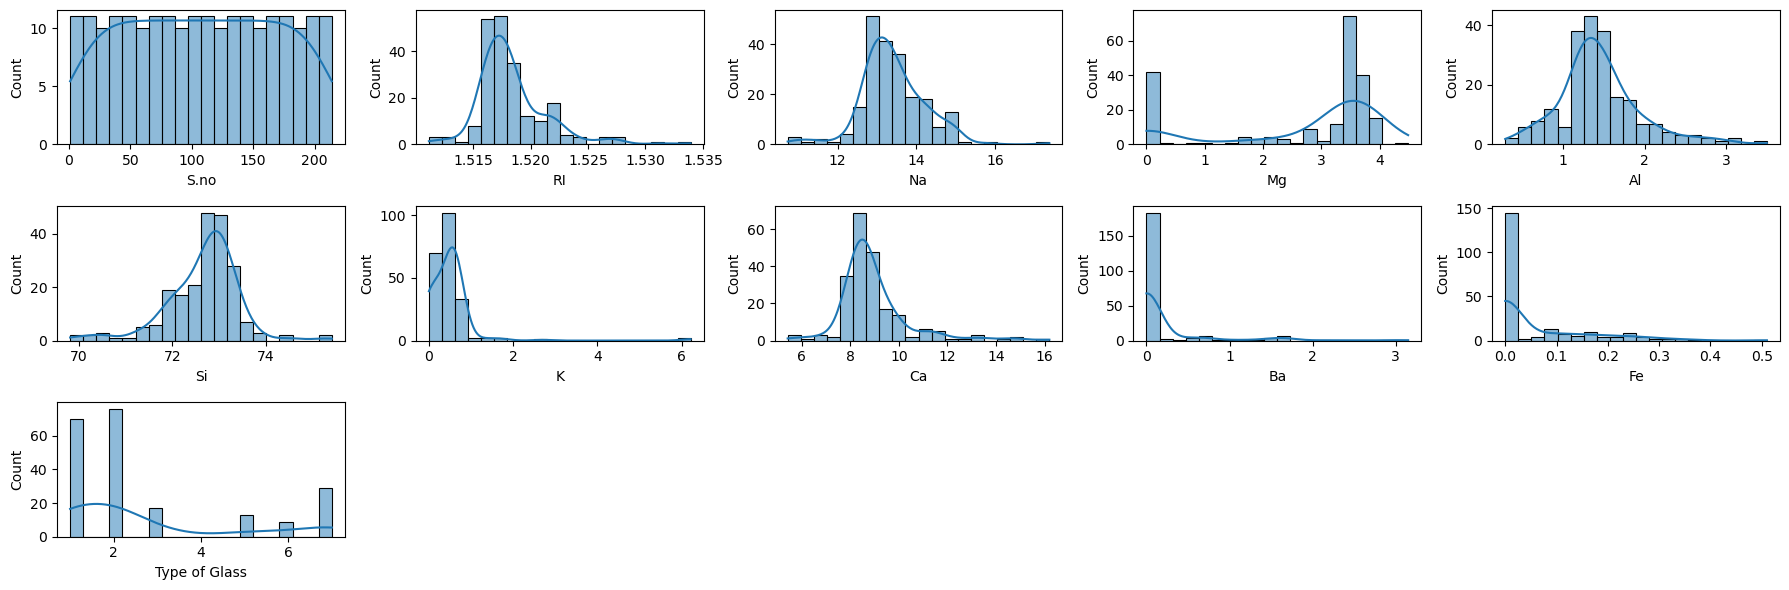

In [11]:
plt.figure(figsize=(18,6))
p = 1
for i in df.columns:
    if p<=13:
        plt.subplot(3,5,p)
        sns.histplot(df[i], kde=True, bins=20)
        plt.xlabel(i)
    p += 1
plt.tight_layout()
plt.show()

In [12]:
df['Type of Glass'] = df['Type of Glass'].replace([3,1,2],'0')
df['Type of Glass'] = df['Type of Glass'].replace([6,7,5],'1')

<AxesSubplot:xlabel='Type of Glass', ylabel='count'>

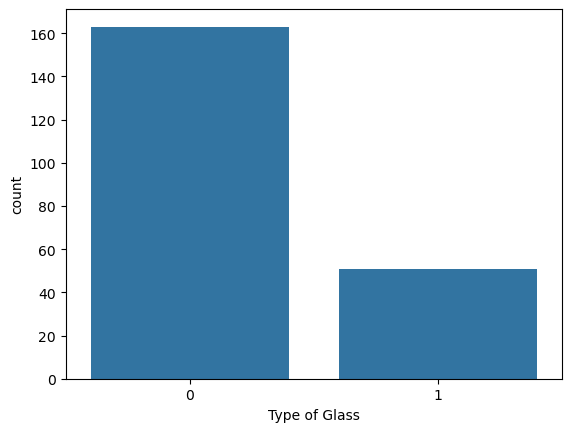

In [13]:
sns.countplot(x = 'Type of Glass', data =df)

As the Labels are imbalanced, so going to oversample it

In [14]:
!pip install imblearn

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
x = df.drop('Type of Glass', axis=1)
y = df['Type of Glass']

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['fea'] = x.columns

vif

,vif,fea
0,2.037696,S.no
1,9.505048,RI
2,61.847791,Na
3,210.532165,Mg
4,25.684639,Al
5,58.446905,Si
6,43.825489,K
7,212.313360,Ca
8,26.193354,Ba
9,1.218663,Fe


In [21]:
x2=x.drop(['Mg'], axis=1)

In [22]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x2)
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['fea'] = x2.columns

vif

,vif,fea
0,2.011652,S.no
1,9.178619,RI
2,2.096540,Na
3,2.668069,Al
4,3.030454,Si
5,1.935419,K
6,5.409701,Ca
7,1.936218,Ba
8,1.093680,Fe


In [23]:
df.drop(['Mg'],axis=1,inplace =True)

In [24]:
x1 = df.drop('Type of Glass', axis=1)
y1 = df['Type of Glass']

In [25]:
sm = SMOTE()
x2,y2 = sm.fit_resample(x1,y1)

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x2)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y2, test_size=0.33, random_state=7)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [29]:
lr = LogisticRegression() 
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
rc = RandomForestClassifier()
gb = GradientBoostingClassifier()
svm = SVC()

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [31]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))


Score: 0.9907407407407407
--------------------------------------------------
[[53  0]
 [ 1 54]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.98      0.99        55

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108

--------------------------------------------------
Score_train: 1.0


In [32]:
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred_train = dt.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.9722222222222222
--------------------------------------------------
[[53  0]
 [ 3 52]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       1.00      0.95      0.97        55

    accuracy                           0.97       108
   macro avg       0.97      0.97      0.97       108
weighted avg       0.97      0.97      0.97       108

--------------------------------------------------
Score_train: 1.0


In [33]:
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
y_pred_train = kn.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.9629629629629629
--------------------------------------------------
[[53  0]
 [ 4 51]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.93      1.00      0.96        53
           1       1.00      0.93      0.96        55

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.97      0.96      0.96       108

--------------------------------------------------
Score_train: 0.9724770642201835


In [34]:
rc.fit(x_train,y_train)
y_pred = rc.predict(x_test)
y_pred_train = rc.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 1.0
--------------------------------------------------
[[53  0]
 [ 0 55]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        55

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

--------------------------------------------------
Score_train: 1.0


In [35]:
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
y_pred_train = gb.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.9722222222222222
--------------------------------------------------
[[53  0]
 [ 3 52]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       1.00      0.95      0.97        55

    accuracy                           0.97       108
   macro avg       0.97      0.97      0.97       108
weighted avg       0.97      0.97      0.97       108

--------------------------------------------------
Score_train: 1.0


In [36]:
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
y_pred_train = svm.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.9907407407407407
--------------------------------------------------
[[53  0]
 [ 1 54]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.98      0.99        55

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108

--------------------------------------------------
Score_train: 0.9954128440366973


In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
lr_score = cross_val_score(lr,x,y,cv=10)
print(lr_score)
print('*'*50)
print('Log reg:',lr_score.mean())

[0.90909091 1.         1.         1.         1.         1.
 1.         1.         1.         0.61904762]
**************************************************
Log reg: 0.9528138528138529


In [39]:
dt_score = cross_val_score(dt,x,y,cv=10)
print(dt_score)
print('*'*50)
print('Decision Tree:',dt_score.mean())

[0.86363636 1.         1.         1.         1.         1.
 1.         1.         1.         0.61904762]
**************************************************
Decision Tree: 0.9482683982683981


In [40]:
kn_score = cross_val_score(kn,x,y,cv=10)
print(kn_score)
print('*'*50)
print('KNN:',kn_score.mean())

[0.90909091 1.         1.         1.         1.         1.
 1.         1.         1.         0.61904762]
**************************************************
KNN: 0.9528138528138529


In [41]:
gb_score = cross_val_score(gb,x,y,cv=10)
print(gb_score)
print('*'*50)
print('Grad Boost:',gb_score.mean())

[0.86363636 1.         1.         1.         1.         1.
 1.         1.         1.         0.61904762]
**************************************************
Grad Boost: 0.9482683982683981


In [42]:
rc_score = cross_val_score(rc,x,y,cv=10)
print(rc_score)
print('*'*50)
print('Random Forest:',rc_score.mean())

[0.86363636 1.         1.         1.         1.         1.
 1.         1.         1.         0.66666667]
**************************************************
Random Forest: 0.9530303030303029


In [43]:
svm_score = cross_val_score(svm,x,y,cv=10)
print(svm_score)
print('*'*50)
print('SVM',svm_score.mean())

[0.90909091 1.         1.         1.         1.         1.
 1.         1.         1.         0.61904762]
**************************************************
SVM 0.9528138528138529
